# Applicant: Gary Bair

Date Performed: 02/13/2022

### Package Requirements:

In [32]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
import re
import nltk
from nltk.corpus import stopwords

## 1. Regression Modeling

For this exercise, we are interested in better understanding the shapes of iris flowers. Specifically, we are interested in whether the petal length and sepal length are related. We will use the “iris” data set which is available in both R and Python (and also attached as a csv, “Iris_Data.csv”) which includes the petal and sepal lengths and widths and the species of iris to which each example belongs.

In [3]:
iris_df = pd.read_csv('Iris_Data.csv')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sepal Length   150 non-null    float64
 1   Sepal Width    150 non-null    float64
 2    Petal Length  150 non-null    float64
 3   Petal Width    150 non-null    float64
 4   Labels         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### a)	How many irises belong to each species? 

In [4]:
iris_df.Labels.value_counts()

0    50
1    50
2    50
Name: Labels, dtype: int64

50 records are observed for each species.

### b)	Make a scatterplot of petal length vs sepal length. Color the dots according to species. Document your observations (2-3 sentences)

<AxesSubplot:xlabel=' Petal Length', ylabel='Sepal Length'>

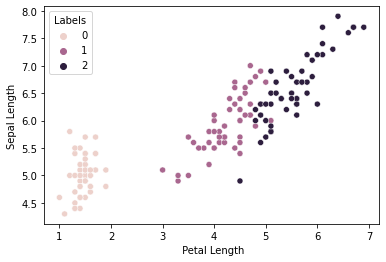

In [6]:
sns.scatterplot(data = iris_df, 
                x = ' Petal Length', 
                y = 'Sepal Length', 
                hue = 'Labels')

Two distinct clusters can be observed in the scatterplot. The larger cluster appears to note a positive linear relationship between petal length and sepal length and the second smaller cluster may not observe the same degree of relation.

### c)	Fit a regression model predicting sepal length based on petal length, petal width and sepal width (you do not need to test any of the regression assumptions). 

In [9]:
X = iris_df[[' Petal Length', 'Petal Width', 'Sepal Width']]
X = sm.add_constant(X)

y = iris_df['Sepal Length']

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Sepal Length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           6.28e-62
Time:                        22:01:22   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8451      0.250      7.368

### d)	Describe the results of your regression, focusing on the relationship between sepal length and petal length.

The regression summary indicates that each predictor in the analysis is statistically significant. If we are to focus on the relationship between sepal length and petal length, our regression predicts that for each unit increase in petal length is predicted to yield an increase in sepal length of .7111.

### e)	Extra Credit: Fit a regression model predicting sepal length based on petal length, petal width, sepal width and species (you do not need to test for any of the “classical” regression assumptions).  This is the same as part c but also with species as a predictor. Describe the results.

In [13]:
X = iris_df[[' Petal Length', 'Petal Width', 'Sepal Width']]

species_dummies = pd.get_dummies(iris_df['Labels'], drop_first = True)

X = pd.concat([X, species_dummies], axis = 1)
X = sm.add_constant(X)

y = iris_df['Sepal Length']

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Sepal Length   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     188.8
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.22e-61
Time:                        22:47:26   Log-Likelihood:                -32.367
No. Observations:                 150   AIC:                             76.73
Df Residuals:                     144   BIC:                             94.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1586      0.279      7.726

Adding species technically increases the performance of the model as denoted in the adjusted R-squared however the increase is so minimal that it may not generalize well.

## 2. Implementing an Edit-Distance Algorithm

Write a program to calculate a variant of the Hamming distance with two key modifications to the standard algorithm. In information theory, the Hamming distance is a measure of the distance between two text strings. This is calculated by adding one to the Hamming distance for each character that is different between the two strings. For example, “kitten" and “mitten" have a Hamming distance of 1. See https://en.wikipedia.org/wiki/Hamming_distance for more information. 
Modifications to the standard Hamming distance algorithm for the purposes of this exercise include:

1. Add .5 to the Hamming distance if a capital letter is switched for a lower case letter unless it is in the first position.  
    Examples include: 
    - "Kitten" and "kitten" have a distance of 0 
    - "kitten" and "KiTten" have a Hamming distance of .5.
    - "Puppy" and "POppy" have a distance of 1.5 (1 for the different letter, additional .5 for the different capitalization). 


2. Consider S and Z (and s and z) to be the same letter. For example, "analyze" has a distance of 0 from "analyse".


Test cases with expected outputs:

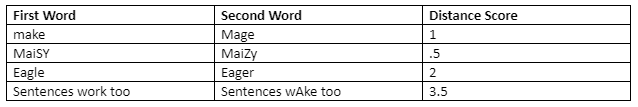

In [16]:
def adj_hamming_distance(string1, string2): 
    distance = 0
    ### Algorthim assumes strings are same length
    string_len = len(string1)
    for i in range(string_len):
        ### Testing for correct character
        if string1[i].lower() == 's' and string2[i].lower() == 'z':
            pass ### special case that does not increase Hamming score
        elif string1[i].lower() == 'z' and string2[i].lower() == 's':
            pass ### special case that does not increase Hamming score
        elif string1[i].lower() != string2[i].lower():
            distance += 1
        else:
            pass
        ### Testing for correct capitalization
        if i == 0:
            pass ### special case that does not increase Hamming score
        elif string1[i] == string1[i].lower() and string2[i] == string2[i].lower():
            pass ### cases are the same - lower
        elif string1[i] == string1[i].upper() and string2[i] == string2[i].upper():
            pass ### cases are the same - upper
        else:
            distance += .5    
    return distance

Use the program you wrote to score the following strings:

### a)	"data Science" to "Data Sciency"

In [17]:
adj_hamming_distance("data Science", "Data Sciency")

1

### b)	"organizing" to "orGanising"

In [18]:
adj_hamming_distance("organizing", "orGanising")

0.5

### c)	"AGPRklafsdyweIllIIgEnXuTggzF" to "AgpRkliFZdiweIllIIgENXUTygSF")

In [19]:
adj_hamming_distance("AGPRklafsdyweIllIIgEnXuTggzF", "AgpRkliFZdiweIllIIgENXUTygSF")

6.5

Then:
### a)	Describe a scenario (3-4 sentences) where implementing the standard Hamming distance algorithm would be applicable. 

Given that Hamming distance is computed to determine the similiarity of two equal length strings, the standard algorthim is commonly used for error detection and correction of data tranmistted over computer networks. This solution only works as the code transmitted is binary and does not have potential for miscapialziaztions or characters beside '0' and '1'.

## 3. Data Cleaning

Perform some data cleaning using the provided file, “patent_drawing.csv”. “Patent_drawing.csv” contains a list of patents and a short description of each drawing included with a patent grant. For example, patent number 0233365 (https://patents.google.com/patent/US20030233365A1/en) has 16 images. For each image, there is a brief description of the drawings. The description is included in the “text” field in patent_drawing.csv.

In [56]:
patent_df = pd.read_csv('patent_drawing data.csv')
patent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uuid       8156 non-null   object
 1   patent_id  8156 non-null   object
 2   text       8156 non-null   object
dtypes: object(3)
memory usage: 191.3+ KB


In [57]:
patent_df.head()

,uuid,patent_id,text
0,urfl2ulyjgez01g5selfflnz7,4491930,A better understanding of the invention may be...
1,nqdxwthotlcted3d961ao373x,4490979,A better understanding of the invention will b...
2,9mwinm7as0p0j3245tdxhfuiz,4491969,A better understanding of the invention will b...
3,l1n6w0ofqic6yow2t7qwmvqry,4490948,A better understanding of the present inventio...
4,86bndneq4omf3mfxi60dzr5mx,4491426,A better understanding of the present inventio...


In [70]:
def clean_text(text): 
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()

def join_text(text_list): 
    return ' '.join(text_list)

In [71]:
stop = stopwords.words('english')

In [72]:
patent_df['clean_text'] = patent_df['text'].str.lower()
patent_df['clean_text'] = patent_df['clean_text'].map(clean_text)
patent_df['clean_text'] = patent_df['clean_text'].apply(lambda x: [word for word in x if word not in (stop)])
patent_df['clean_text'] = patent_df['clean_text'].map(join_text)

In [73]:
patent_df.head()

,uuid,patent_id,text,clean_text
0,urfl2ulyjgez01g5selfflnz7,4491930,A better understanding of the invention may be...,better understanding invention may obtained co...
1,nqdxwthotlcted3d961ao373x,4490979,A better understanding of the invention will b...,better understanding invention following detai...
2,9mwinm7as0p0j3245tdxhfuiz,4491969,A better understanding of the invention will b...,better understanding invention obtained follow...
3,l1n6w0ofqic6yow2t7qwmvqry,4490948,A better understanding of the present inventio...,better understanding present invention many ad...
4,86bndneq4omf3mfxi60dzr5mx,4491426,A better understanding of the present inventio...,better understanding present invention well ob...


### a)	How many of the field descriptions reference a perspective that is not standard (i.e. viewed from the top, bottom, front or rear)? Specifically, write code to count how many of the rows have the words "view" or "perspective" but do not include "bottom", "top", "front" or "rear" in  the text field?

In [103]:
patent_df['contains_search_term'] = patent_df['clean_text'].str.contains( "view|perspective")
patent_df['contains_exclusion_term'] = patent_df['clean_text'].str.contains("bottom|top|front|rear")
patent_df.head()

,uuid,patent_id,text,clean_text,contains_search_term,contains_exclusion_term
0,urfl2ulyjgez01g5selfflnz7,4491930,A better understanding of the invention may be...,better understanding invention may obtained co...,False,False
1,nqdxwthotlcted3d961ao373x,4490979,A better understanding of the invention will b...,better understanding invention following detai...,False,False
2,9mwinm7as0p0j3245tdxhfuiz,4491969,A better understanding of the invention will b...,better understanding invention obtained follow...,False,False
3,l1n6w0ofqic6yow2t7qwmvqry,4490948,A better understanding of the present inventio...,better understanding present invention many ad...,False,False
4,86bndneq4omf3mfxi60dzr5mx,4491426,A better understanding of the present inventio...,better understanding present invention well ob...,False,False


In [122]:
patent_df[(patent_df['contains_search_term'] == True) & (patent_df['contains_exclusion_term'] == False)].count()

uuid                       3665
patent_id                  3665
text                       3665
clean_text                 3665
contains_search_term       3665
contains_exclusion_term    3665
dtype: int64

There appears to be 3665 descriptions containing nonstandard views.

### b)	What is the average number of drawing descriptions per patent? 

In [115]:
patent_df.groupby(['patent_id']).count().mean()

uuid                       7.441606
text                       7.441606
clean_text                 7.441606
contains_search_term       7.441606
contains_exclusion_term    7.441606
dtype: float64

The average number of drawing descriptions per patent is 7.4416